In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


In [3]:
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

In [4]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [6]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.shape

(1000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [12]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [16]:
df = df.drop("Transaction ID", axis=1)


In [23]:
df["Date"] = pd.to_datetime(df["Date"],errors="coerce")

In [24]:
df['year']=df['Date'].dt.year

In [26]:
df['month']=df['Date'].dt.month

In [28]:
df['Weekday']= df['Date'].dt.day_name()

In [29]:
df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,Weekday
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,Friday
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,Monday
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,Friday
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,Sunday
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,Tuesday
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,Friday
997,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,Sunday
998,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,Tuesday


In [30]:
df["year"].unique()

array([2023, 2024], dtype=int32)

In [33]:
df["year"].value_counts()

year
2023    998
2024      2
Name: count, dtype: int64

In [34]:
df['Month_name']=df["Date"].dt.month_name()


In [158]:
df["Month_name"].value_counts()

Month_name
May          105
October       96
August        94
December      91
April         86
February      85
November      78
January       78
June          77
March         73
July          72
September     65
Name: count, dtype: int64

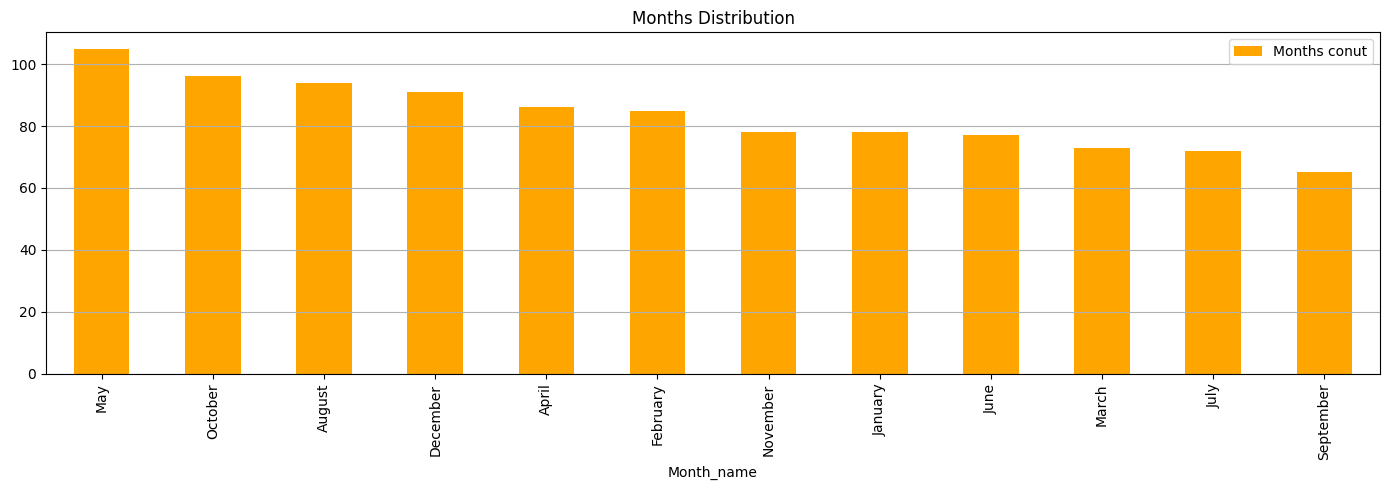

In [55]:
plt.figure(figsize = (14,5))
df["Month_name"].value_counts().plot(kind = "bar", color = "orange",label = "Months conut")
plt.legend()
plt.grid(axis = "y")
plt.title("Months Distribution")
plt.tight_layout()
plt.show()

In [58]:
df["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

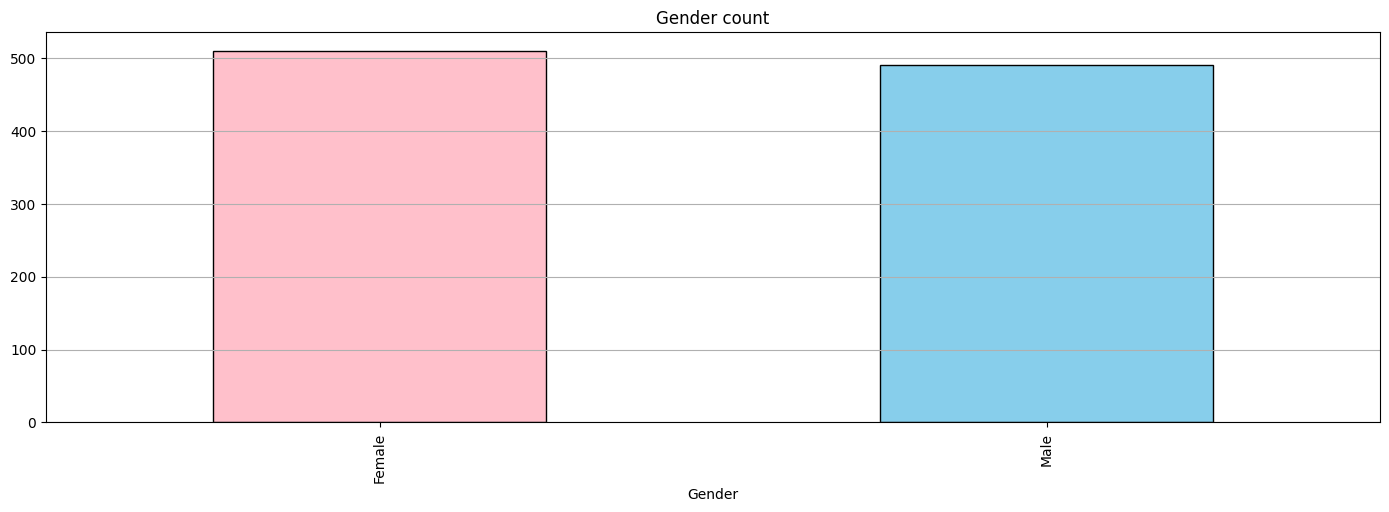

In [66]:
plt.figure(figsize = (14,5))
df["Gender"].value_counts().plot(kind = "bar", color = ["pink", "skyblue"], edgecolor = "black")
plt.tight_layout()
plt.title("Gender count")
plt.grid(axis = "y")
plt.show()

In [60]:
gender_sales = df.groupby("Gender")["Total Amount"].sum()
print(gender_sales)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


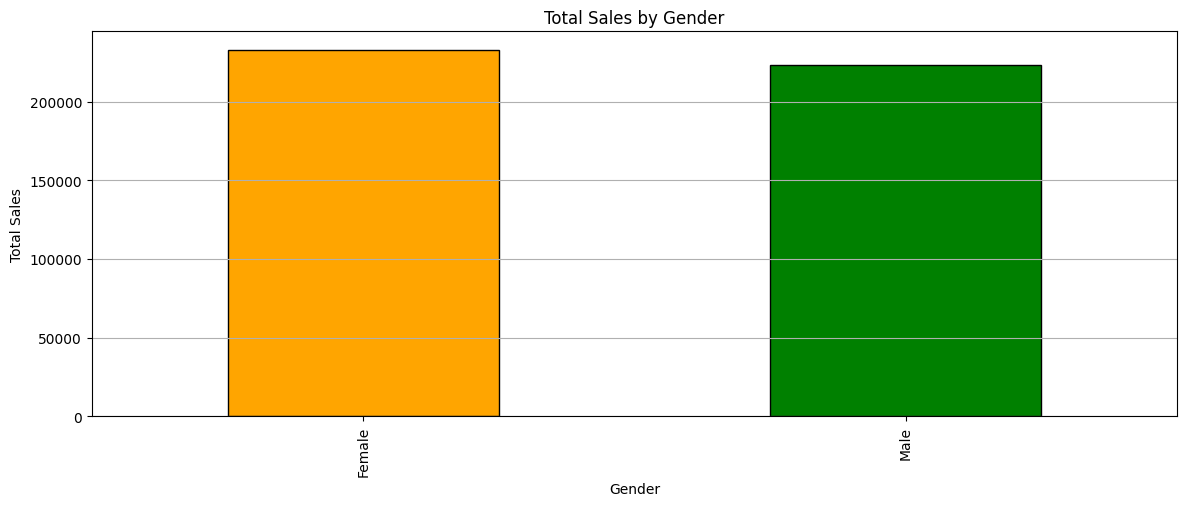

In [65]:
plt.figure(figsize = (14,5))
gender_sales = df.groupby("Gender")["Total Amount"].sum()
gender_sales.plot(kind = "bar", color = ["Orange", "green"],edgecolor="black")
plt.grid(axis = "y")
plt.title("Total Sales by Gender")
plt.ylabel("Total Sales")
plt.show()

In [67]:
df.columns

Index(['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount', 'year', 'month', 'Weekday',
       'Month_name'],
      dtype='object')

In [75]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

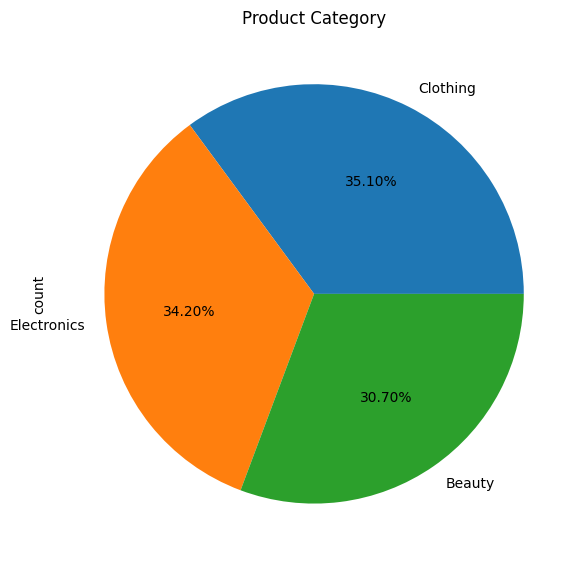

In [89]:
plt.figure(figsize = (6,8))
df["Product Category"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")
plt.tight_layout()
plt.title("Product Category")
plt.show()

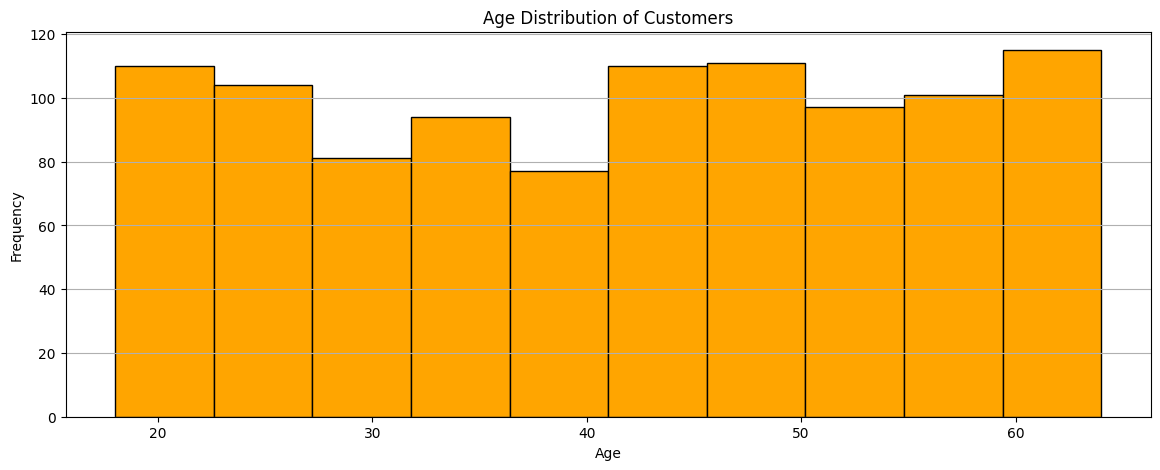

In [94]:
plt.figure(figsize = (14,5))
df["Age"].plot(kind="hist", bins=10, color="orange", edgecolor="black")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.grid(axis = "y")
plt.show()

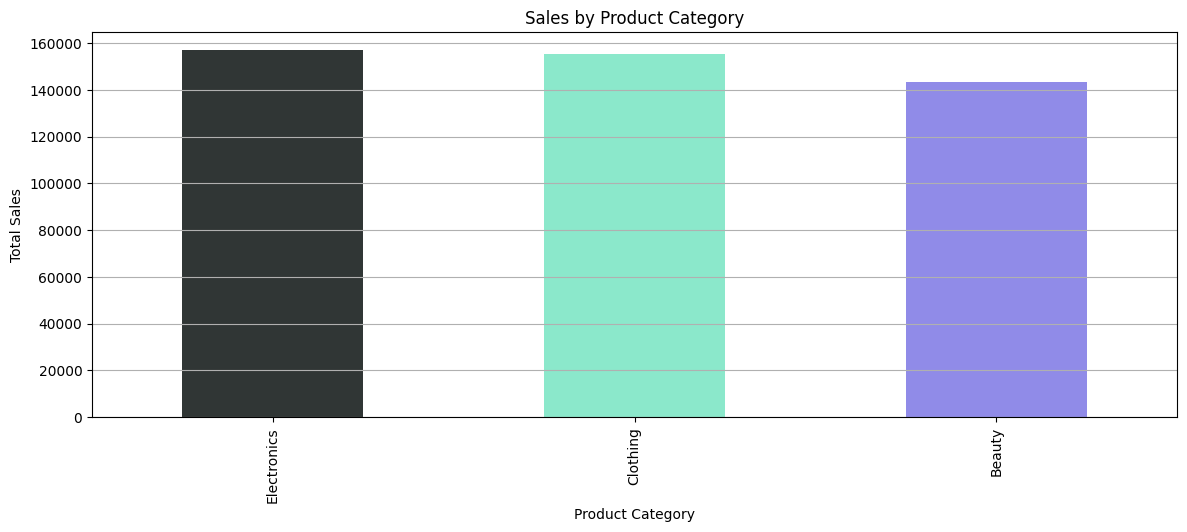

In [111]:
plt.figure(figsize = (14,5))
df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False).plot(kind = "bar", color = ["#303635","#8BE8CB","#908BE8"])
plt.grid(axis = "y")
plt.title("Sales by Product Category")
plt.ylabel("Total Sales")
plt.show()

In [112]:
df.columns

Index(['Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount', 'year', 'month', 'Weekday',
       'Month_name'],
      dtype='object')

In [121]:
df.groupby("Product Category")["Quantity"].sum().sort_values(ascending = False)

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

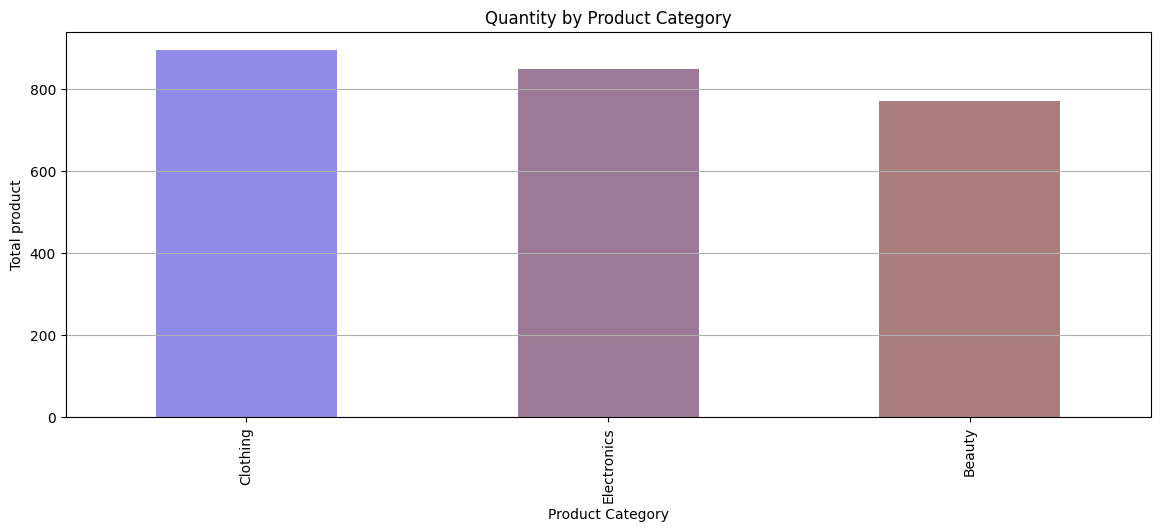

In [134]:
plt.figure(figsize = (14,5))
df.groupby("Product Category")["Quantity"].sum().sort_values(ascending = False).plot(kind = "bar", color = ["#908BE8","#9C7A97","#AB7E7E"])
plt.grid(axis = "y")
plt.title("Quantity by Product Category")
plt.ylabel("Total product")
plt.show()

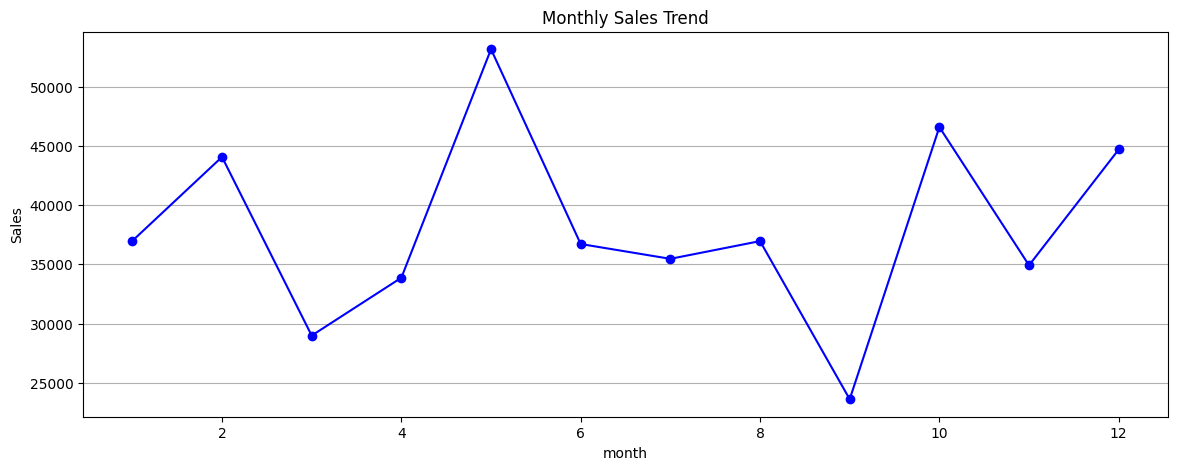

In [151]:
plt.figure(figsize = (14,5))
monthly_sales = df.groupby("month")["Total Amount"].sum()
monthly_sales.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.grid(axis = "y")
plt.show()

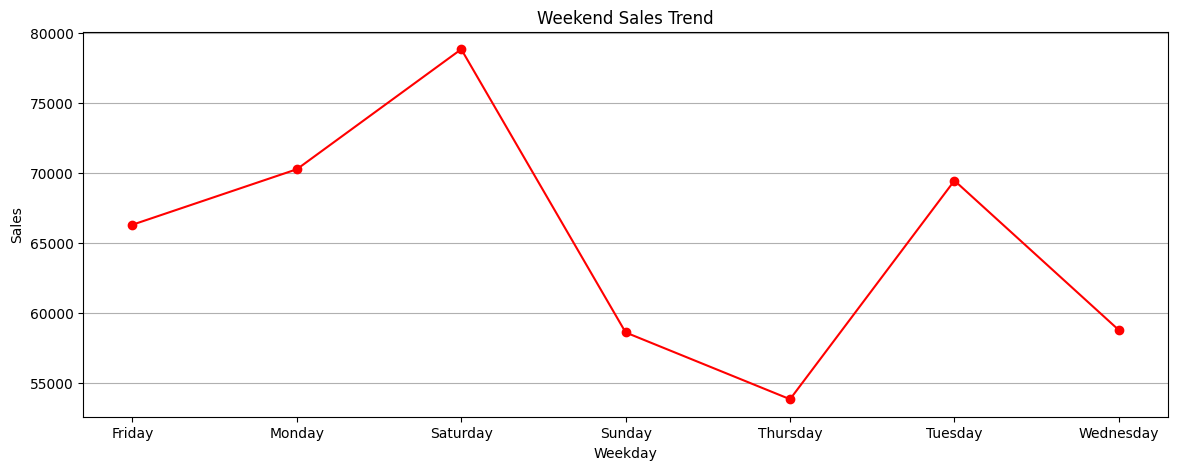

In [152]:
plt.figure(figsize = (14,5))
monthly_sales = df.groupby("Weekday")["Total Amount"].sum()
monthly_sales.plot(kind="line", marker="o", color="red")
plt.title("Weekend Sales Trend")
plt.ylabel("Sales")
plt.grid(axis = "y")
plt.show()

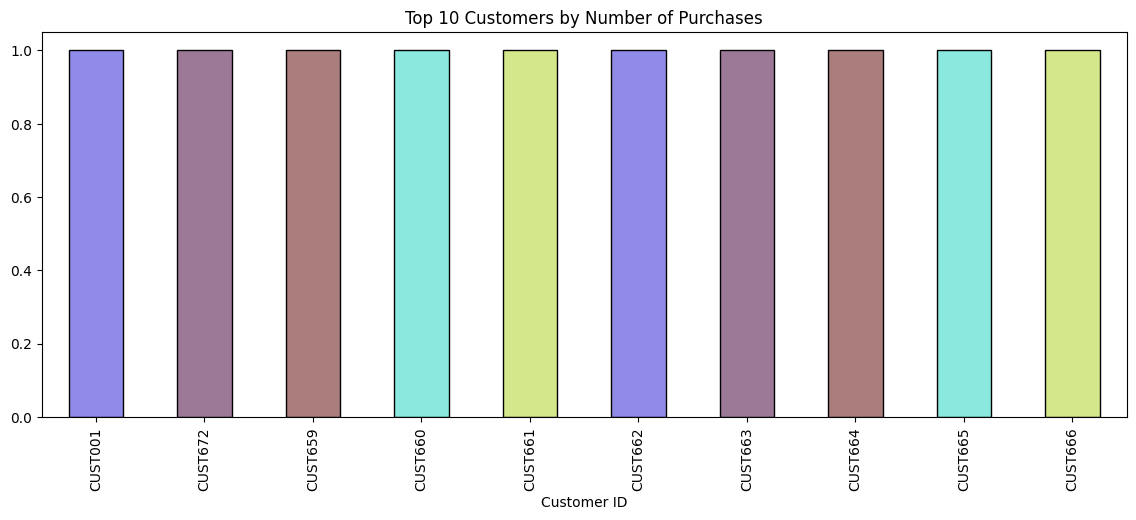

In [150]:
plt.figure(figsize = (14,5))
customer_freq = df["Customer ID"].value_counts().head(10)
customer_freq.plot(kind="bar", color = ["#908BE8","#9C7A97","#AB7E7E","#8BE8DF","#D4E88B"], edgecolor="black")
plt.title("Top 10 Customers by Number of Purchases")
plt.show()


In [154]:
print("Average Basket Size:", np.mean(df["Quantity"]))

Average Basket Size: 2.514


In [155]:
print("Average Spend per Transaction:", np.mean(df["Total Amount"]))

Average Spend per Transaction: 456.0
